<a href="https://colab.research.google.com/github/KalyaniDhanankula/ICT-3/blob/main/P_2_(Gurmukhi_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# Problem 2: implemention of Neural Network
# Gurmukhi Handwritten Digit Classification:

In [50]:
# importing libraries

import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Flatten

In [51]:
# defining path

train_path = '/content/sample_data/drive'
val_path = '/content/sample_data/drive'

In [52]:
# Setting  the path
data_dir = train_path

# setting image size
img_size = (32, 32)

#creating empty lists
images = []
labels = []

# looping 
for label in range(6):folder_path = os.path.join(data_dir, 'train', str(label))
for file in os.listdir(folder_path):file_path = os.path.join(folder_path, file)
if file_path.endswith(('.tiff','.bmp')):img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, img_size)
images.append(img)
labels.append(label)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
np.save('x_train.npy', images)
np.save('y_train.npy', labels)

In [53]:
# Setting the path and loading the image
data_dir_val = val_path
img_size_val = (32, 32)
images_val = []
labels_val = []
for label in range(6):folder_path = os.path.join(data_dir_val, 'val', str(label))
for file in os.listdir(folder_path):file_path = os.path.join(folder_path, file)
if file_path.endswith(('.tiff','.bmp')):img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, img_size_val)
images_val.append(img)
labels_val.append(label)
images_val = np.array(images_val)
labels_val = np.array(labels_val)
np.save('x_test.npy', images_val)
np.save('y_test.npy', labels_val)

In [54]:
# Loading dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

1
1
(1, 32, 32)
(1, 32, 32)


array([5])

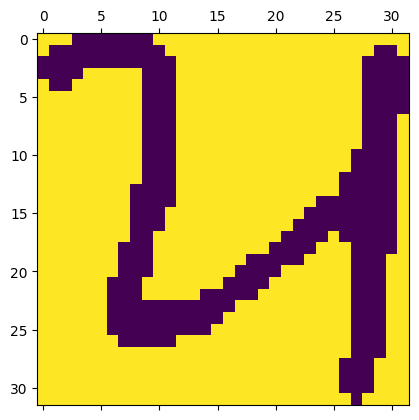

In [55]:
# Images
print(len(x_train))
print(len(x_test))
x_train[0].shape
x_train[0]
plt.matshow(x_train[0])
print(x_train.shape)
print(x_test.shape)
y_train
y_test



In [56]:
model = keras.Sequential([
keras.layers.Flatten(),keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')
])
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)
model.fit(x_train, y_train,epochs= 10, validation_data=(x_test, y_test))

Epoch 1/10
1/1 [==============================] - 1s 614ms/step - loss: 226.6748 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 38ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 30ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.

In [57]:
# Check the accuracy
x_train_scaled = x_train/255
x_test_scaled = x_test/255
model.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))


Epoch 1/10
1/1 [==============================] - 0s 352ms/step - loss: 0.2094 - accuracy: 1.0000 - val_loss: 0.1866 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 31ms/step - loss: 0.1343 - accuracy: 1.0000 - val_loss: 0.1170 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 31ms/step - loss: 0.0779 - accuracy: 1.0000 - val_loss: 0.0709 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 31ms/step - loss: 0.0435 - accuracy: 1.0000 - val_loss: 0.0432 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 33ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 0.0270 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 29ms/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 29ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 8/10
1/1 [==========

In [58]:
# evaluate test dataset
model.evaluate(x_test_scaled,y_test)


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - accuracy: 1.0000


[0.0050238328985869884, 1.0]

1/1 [==============================] - 0s 49ms/step
5


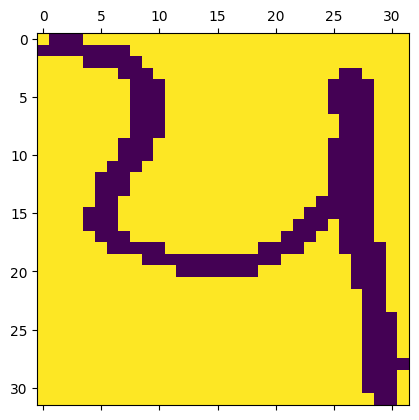

In [59]:
# predict 
plt.matshow(x_test[0])
y_predicted = model.predict(x_test_scaled)
y_predicted[0]
print(np.argmax(y_predicted[0]))


In [60]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

[5] 1


<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

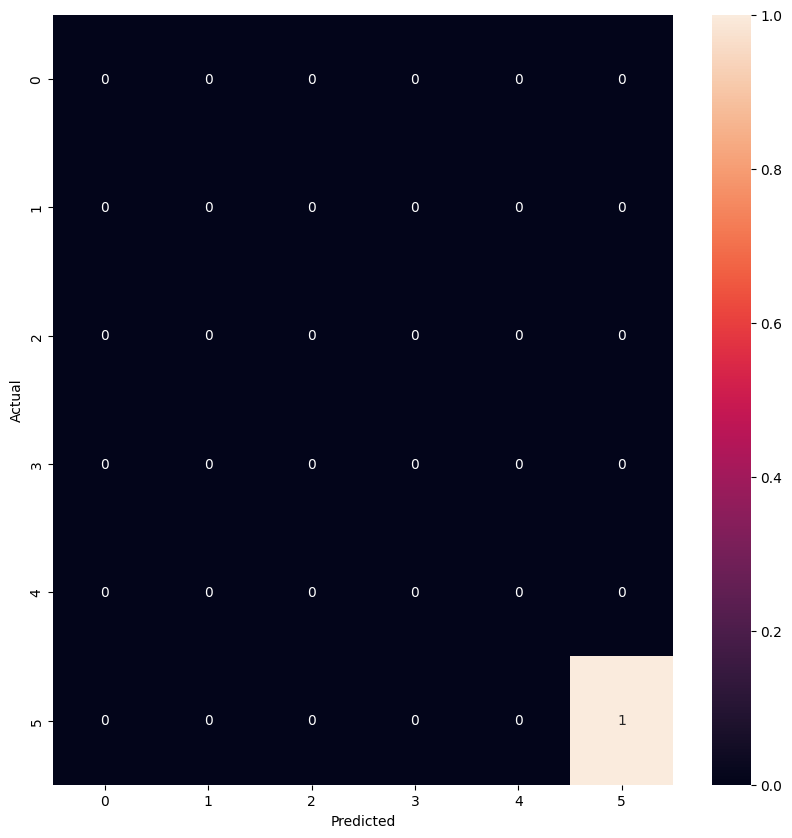

In [61]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [62]:
model2 = keras.Sequential([
 keras.layers.Flatten(),
 keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
 keras.layers.Dense(10, activation='softmax')
])
model2.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )
# train the model
history = model2.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
1/1 [==============================] - 1s 941ms/step - loss: 2.1160 - accuracy: 0.0000e+00 - val_loss: 3.1352e-05 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 55ms/step - loss: 6.4373e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 72ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 61ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 68ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.00

In [63]:
model2.evaluate(x_test_scaled,y_test)


1/1 [==============================] - 0s 30ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [64]:
y_predicted = model2.predict(x_test_scaled)
y_predicted[0]
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

1/1 [==============================] - 0s 77ms/step
[5] 1


<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

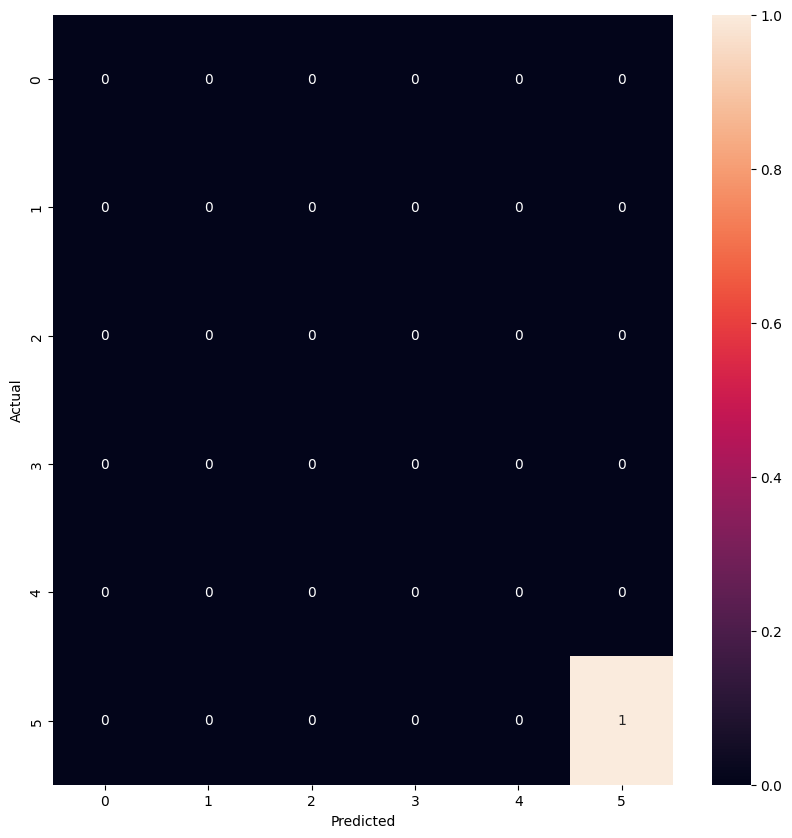

In [65]:
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')


1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 1.0


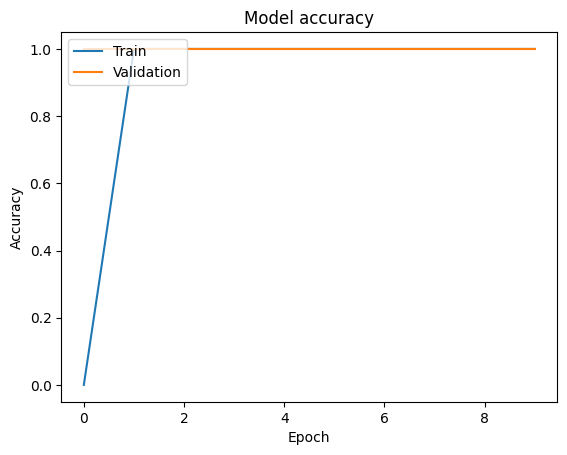

In [66]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()